## [Original Colab Notebook](https://drive.google.com/file/d/1ufsVNm3xjI2Ri8QSqgEq3-QsUSrqrhNL/view?usp=sharing)<br/>
## [Original Dataset](https://github.com/UCSD-AI4H/COVID-CT)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
path = '/content/drive/MyDrive/COVID-CT'
datapath = '/content/drive/MyDrive/COVID-CT/Images-processed'
print(os.path.exists(datapath))

True


In [ ]:
import tensorflow as tf

In [ ]:
#if set_memory_growth is enabled, the runtime initialization will not allocate all memory on the device. 
#Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
import pathlib

def get_imagepath_and_labels(datapath):
    data_root = pathlib.Path(datapath)
    all_image_path = [str(path) for path in list(data_root.glob('*/*'))]

    label_names = sorted(item.name for item in data_root.glob('*/*'))

    all_image_label = [pathlib.Path(single_image_path).parent.name for single_image_path in all_image_path]

    return all_image_path, all_image_label

all_image_path, all_image_label = get_imagepath_and_labels(datapath)

In [ ]:
print(len(all_image_path))
print(len(all_image_label))

778
778


In [ ]:
print(all_image_path[1])

/content/drive/MyDrive/COVID-CT/Images-processed/CT_COVID/2020.03.10.20032136-p34-118_2%0 (1).png


In [ ]:
# import  matplotlib.pyplot as plt
# import numpy as np
# image_path = all_image_path[700]
# print(image_path)
# image = tf.io.read_file(image_path)
# read_image = tf.image.decode_jpeg(image, channels=3)
# # pil_image = Image.open(image_path)
# read_image = np.asarray(read_image)
# plt.figure(figsize=(20, 4))
# plt.imshow(read_image)
# plt.show()

In [ ]:
# print(read_image.shape)
# (_, _, _) = plt.hist(read_image.ravel(), bins=32, density=True)

In [ ]:
# image = tf.convert_to_tensor(read_image, dtype=tf.float32)
# print(image.shape)
# print(type(image))
# np_image = np.asarray(image)
# (_, _,_) = plt.hist(np_image.ravel(), bins=32, density=True)

In [ ]:
# image_path = all_image_path[700]
# ext = os.path.splitext(image_path)[1]
# if ext == ".png" : print(True)

In [ ]:
import numpy as np
from PIL import Image
def get_images_and_labels_astensor(image_path, image_labels):
    '''
    target_size is to resize the image.
    '''
    images = []
    labels = []
    for i in range(0, len(image_path)):
        image = image_as_nparray(image_path[i])
        images.append(image)
        labels.append(image_labels[i])
    
    images = np.array(images, dtype=object)
    labels = np.array(labels, dtype=object)
    return images, labels

def image_as_nparray(image_path):
        # image = Image.open(image_path).convert('RGB')
        # image = np.asarray(pil_image)
        ext = os.path.splitext(image_path)[1]
        if ext == '.jpg':
            image = tf.io.read_file(image_path)
            image = tf.image.decode_jpeg(image, channels=3)
            # image = tf.image.resize(image, target_size)
            # image = tf.cast(image, tf.float32 )
            # image = image / 255
            # image = tf.convert_to_tensor(image, dtype=tf.float32)
            return image
        else :
            image = tf.io.read_file(image_path)
            image = tf.image.decode_png(image, channels=3)
            return image



images, labels = get_images_and_labels_astensor(all_image_path, all_image_label)

print(images.shape)
print(labels.shape)

(778,)
(778,)


In [ ]:
print(type(images))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape)
print(labels.shape)

(778,)
(778,)


In [ ]:
print(np.unique(labels, return_counts=True))

(array(['CT_COVID', 'CT_NonCOVID'], dtype=object), array([367, 411]))


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train_original, X_test_original, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=203, 
    shuffle=True,
    random_state=42,
    stratify=labels
)

print(X_train_original.shape)
print(y_train.shape)
print(X_test_original.shape)
print(y_test.shape)

(575,)
(575,)
(203,)
(203,)


In [ ]:
print(np.unique(y_test, return_counts=True))

(array(['CT_COVID', 'CT_NonCOVID'], dtype=object), array([ 96, 107]))


In [ ]:
X_train_original, X_valid_original, y_train, y_valid = train_test_split(
    X_train_original, 
    y_train, 
    test_size=118, 
    shuffle=True,
    random_state=42,
    stratify=y_train
)


print(X_train_original.shape)
print(y_train.shape)
print(X_test_original.shape)
print(y_test.shape)
print(X_valid_original.shape)
print(y_valid.shape)

(457,)
(457,)
(203,)
(203,)
(118,)
(118,)


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_valid, return_counts=True))
print(np.unique(y_test, return_counts=True)) 

(array(['CT_COVID', 'CT_NonCOVID'], dtype=object), array([215, 242]))
(array(['CT_COVID', 'CT_NonCOVID'], dtype=object), array([56, 62]))
(array(['CT_COVID', 'CT_NonCOVID'], dtype=object), array([ 96, 107]))


In [ ]:
import torchvision.transforms as transforms
# transforms using pytorch api
train_transformer1 = transforms.Compose([
                        transforms.Resize(256),
                        transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor()
])

train_transformer2 = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_transformer3 = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
    transforms.RandomRotation(5),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
                        transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor()
])

valid_transformer = transforms.Compose([
                        transforms.Resize((224, 224)),
                        # transforms.CenterCrop(224),
                        transforms.ToTensor()
])



In [ ]:
def transforms_on_image(tf_image, transformation):
    np_image = np.asarray(tf_image)
    pil_image = Image.fromarray(np_image, mode='RGB')
    # print(type(pil_image))
    # print(pil_image.size)
    assert len(pil_image.getbands()) == 3, "something wrong with the input image, may be not 3 dimensional" 


    torch_image = transformation(pil_image)
    torch_image = torch_image.permute(1, 2, 0)

    augmented_image = np.asarray(torch_image)
    augmented_image = tf.convert_to_tensor(augmented_image, dtype=tf.float32)
    return augmented_image
def transform_set(images, transformation):
    aug_images = []
    for i in range(0, len(images)):
        aug_images.append(transforms_on_image(images[i], transformation))
    
    aug_images = np.array(aug_images)
    return aug_images

In [ ]:
X_train1 = transform_set(X_train_original, train_transformer1)
print(X_train1.shape)
X_train2 = transform_set(X_train_original, train_transformer2)
print(X_train2.shape)
X_train3 = transform_set(X_train_original, train_transformer3)
print(X_train3.shape)

(457, 224, 224, 3)
(457, 224, 224, 3)
(457, 224, 224, 3)


In [ ]:
X_test = transform_set(X_test_original, test_transformer)
print(X_test.shape)

X_valid = transform_set(X_valid_original, test_transformer)
print(X_valid.shape)

X_test_original = transform_set(X_test_original, valid_transformer)
print(X_test_original.shape)

X_valid_original = transform_set(X_valid_original, valid_transformer)
print(X_valid_original.shape)

(203, 224, 224, 3)
(118, 224, 224, 3)
(203, 224, 224, 3)
(118, 224, 224, 3)


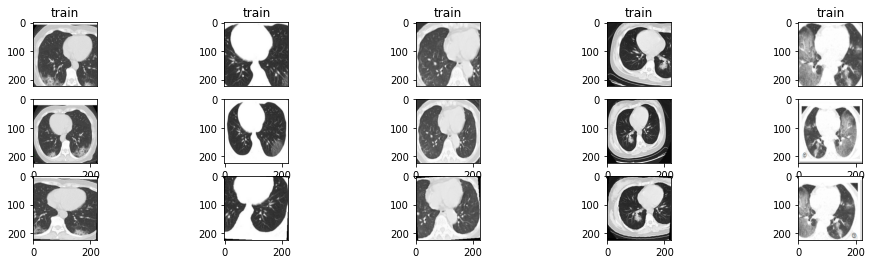

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n=6
for i in range(1, n):
    ax1 = plt.subplot(3, n, i)
    plt.imshow(X_train1[i])
    ax1.title.set_text("train")
    ax1.set_xticks([])

    ax2 = plt.subplot(3, n, i+n)
    plt.imshow(X_train2[i])

    ax3 = plt.subplot(3, n, i+n+n)
    plt.imshow(X_train3[i])
plt.show()

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target

def prepare_targets(y_train, y_test, y_valid):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    y_valid_enc = le.transform(y_valid)
    return y_train_enc, y_test_enc, y_valid_enc

y_train_enc, y_test_enc, y_valid_enc = prepare_targets(y_train, y_test, y_valid)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train_enc, 2)
y_test_cat = to_categorical(y_test_enc, 2)
y_valid_cat = to_categorical(y_valid_enc, 2)

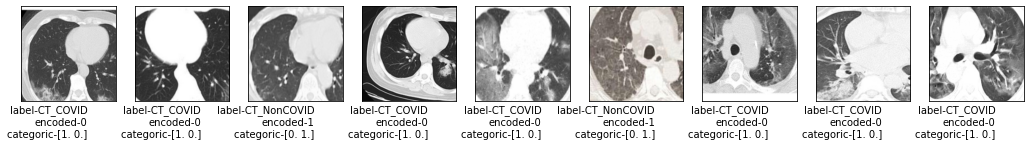

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train1[i])
    ax.text(0.7, -0.4, "label-{0}\nencoded-{1}\ncategoric-{2}".format(y_train[i], y_train_enc[i], y_train_cat[i]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=10)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# converting the data to tf.tensor
X_train1 = tf.convert_to_tensor(X_train1)
X_train2 = tf.convert_to_tensor(X_train2)
X_train3 = tf.convert_to_tensor(X_train3)
X_test = tf.convert_to_tensor(X_test)
X_test_original = tf.convert_to_tensor(X_test_original)

X_valid = tf.convert_to_tensor(X_valid)
X_valid_original = tf.convert_to_tensor(X_valid_original)

y_train_enc = tf.convert_to_tensor(y_train_enc)
y_test_enc = tf.convert_to_tensor(y_test_enc)
y_valid_enc = tf.convert_to_tensor(y_valid_enc)

y_train_cat = tf.convert_to_tensor(y_train_cat)
y_test_cat = tf.convert_to_tensor(y_test_cat)
y_valid_cat = tf.convert_to_tensor(y_valid_cat)

Plotting implementation

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
X_train = tf.concat([X_train1, X_train2, X_train3], 0)
Y_train_cat = tf.concat([y_train_cat, y_train_cat, y_train_cat], 0)
print(X_train.shape)
print(Y_train_cat.shape)

(1371, 224, 224, 3)
(1371, 2)


Model Implementation

Loading vgg19 and adding layers

In [ ]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3))
# vgg_model.summary()
vgg_model.trainable=False 

x = vgg_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
vgg_output = tf.keras.layers.Dense(2, activation='softmax')(x)

vgg = tf.keras.models.Model(vgg_model.input, vgg_output)
vgg._name='vgg19'
vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model_checkpoint_path = path + '/models/test3/vgg-output1'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)
# model_earlystopping_callback = tf.keras.callbacks.EarlyStopping(
#                                                     monitor='val_loss',
#                                                     patience = 5,
#                                                     mode='min')

In [ ]:
vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

vgg_history = vgg.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size = 16,
                    validation_data=(X_valid_original, y_valid_cat))
vgg.save(model_checkpoint_path)

Epoch 1/100
86/86 [==============================] - 23s 131ms/step - loss: 1.9568 - binary_accuracy: 0.5252 - val_loss: 0.6803 - val_binary_accuracy: 0.4831
Epoch 2/100
86/86 [==============================] - 9s 103ms/step - loss: 0.7199 - binary_accuracy: 0.5857 - val_loss: 0.6368 - val_binary_accuracy: 0.6610
Epoch 3/100
86/86 [==============================] - 9s 103ms/step - loss: 0.6097 - binary_accuracy: 0.6740 - val_loss: 0.5660 - val_binary_accuracy: 0.6949
Epoch 4/100
86/86 [==============================] - 9s 104ms/step - loss: 0.5805 - binary_accuracy: 0.7090 - val_loss: 0.5561 - val_binary_accuracy: 0.6949
Epoch 5/100
86/86 [==============================] - 9s 105ms/step - loss: 0.5589 - binary_accuracy: 0.7141 - val_loss: 0.5526 - val_binary_accuracy: 0.7034
Epoch 6/100
86/86 [==============================] - 9s 105ms/step - loss: 0.4970 - binary_accuracy: 0.7622 - val_loss: 0.4986 - val_binary_accuracy: 0.7881
Epoch 7/100
86/86 [==============================] - 9s 1

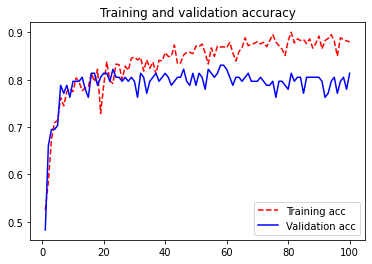

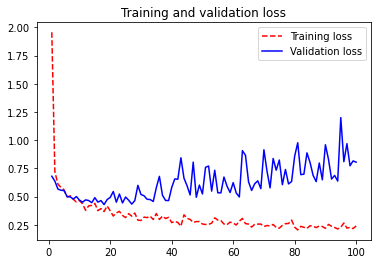

In [ ]:
plot_accuracy_and_loss(vgg_history)

In [ ]:
test_loss, test_acc = vgg.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 4s 180ms/step - loss: 0.6743 - binary_accuracy: 0.8128
Accuracy: 0.8128078579902649
Loss:  0.674344003200531


Part 2 - DenseNet 169 

In [ ]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model.trainable=False 

y = dense169_model.layers[-1].output
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dropout(0.5)(y)
y = tf.keras.layers.Dense(1000, activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)
densenet_1_output = tf.keras.layers.Dense(2, activation='softmax')(y)

densenet_1 = tf.keras.models.Model(dense169_model.input, densenet_1_output)
densenet_1._name='densenet_1'
densenet_1.summary()

51888128/51877672 [==============================] - 1s 0us/step
Model: "densenet_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                        

In [ ]:
model_checkpoint_path = path + '/models/test3/densenet-output2'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
densenet_1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_1_history = densenet_1.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_valid_original, y_valid_cat))

densenet_1.save(model_checkpoint_path)

Epoch 1/100
86/86 [==============================] - 24s 147ms/step - loss: 6.5271 - binary_accuracy: 0.6776 - val_loss: 1.2415 - val_binary_accuracy: 0.7881
Epoch 2/100
86/86 [==============================] - 7s 86ms/step - loss: 0.6003 - binary_accuracy: 0.8162 - val_loss: 0.4641 - val_binary_accuracy: 0.8051
Epoch 3/100
86/86 [==============================] - 7s 87ms/step - loss: 0.3496 - binary_accuracy: 0.8636 - val_loss: 0.5784 - val_binary_accuracy: 0.8305
Epoch 4/100
86/86 [==============================] - 8s 89ms/step - loss: 0.3197 - binary_accuracy: 0.8738 - val_loss: 0.4722 - val_binary_accuracy: 0.8051
Epoch 5/100
86/86 [==============================] - 7s 87ms/step - loss: 0.2346 - binary_accuracy: 0.9044 - val_loss: 0.3868 - val_binary_accuracy: 0.8305
Epoch 6/100
86/86 [==============================] - 8s 88ms/step - loss: 0.2364 - binary_accuracy: 0.9110 - val_loss: 0.4934 - val_binary_accuracy: 0.8475
Epoch 7/100
86/86 [==============================] - 7s 87ms/s

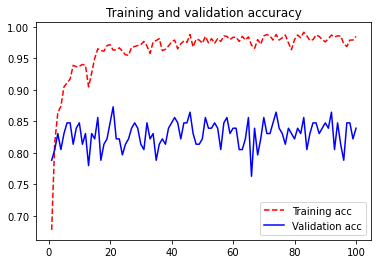

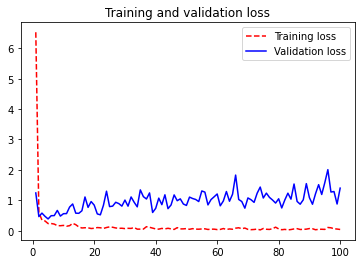

In [ ]:
plot_accuracy_and_loss(densenet_1_history)

In [ ]:
test_loss, test_acc = densenet_1.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 3s 105ms/step - loss: 0.7878 - binary_accuracy: 0.8719
Accuracy: 0.871921181678772
Loss:  0.7878355383872986


Part 3 - Densenet 169

In [ ]:
dense169_model2 = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model2.trainable=False 
# since the model is already loaded we load in again
z = dense169_model2.layers[-1].output
z = tf.keras.layers.Flatten()(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(1000, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(500, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(200, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
densenet_2_output = tf.keras.layers.Dense(2, activation='softmax')(z)

densenet_2 = tf.keras.models.Model(dense169_model2.input, densenet_2_output)
densenet_2._name='densenet_2'
densenet_2.summary()

Model: "densenet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                        

In [ ]:
model_checkpoint_path = path + '/models/test3/densenet-output3'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
densenet_2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_2_history = densenet_2.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size = 16,
                    validation_data=(X_valid_original, y_valid_cat) )

densenet_2.save(model_checkpoint_path)

Epoch 1/100
86/86 [==============================] - 22s 116ms/step - loss: 7.5765 - binary_accuracy: 0.5361 - val_loss: 0.7438 - val_binary_accuracy: 0.6186
Epoch 2/100
86/86 [==============================] - 7s 87ms/step - loss: 1.1264 - binary_accuracy: 0.6492 - val_loss: 0.5538 - val_binary_accuracy: 0.7797
Epoch 3/100
86/86 [==============================] - 7s 87ms/step - loss: 0.5988 - binary_accuracy: 0.7148 - val_loss: 0.5507 - val_binary_accuracy: 0.7881
Epoch 4/100
86/86 [==============================] - 7s 87ms/step - loss: 0.5589 - binary_accuracy: 0.7520 - val_loss: 0.5492 - val_binary_accuracy: 0.7712
Epoch 5/100
86/86 [==============================] - 8s 88ms/step - loss: 0.5448 - binary_accuracy: 0.7462 - val_loss: 0.5838 - val_binary_accuracy: 0.7288
Epoch 6/100
86/86 [==============================] - 8s 89ms/step - loss: 0.5019 - binary_accuracy: 0.7856 - val_loss: 0.4947 - val_binary_accuracy: 0.7627
Epoch 7/100
86/86 [==============================] - 8s 88ms/s

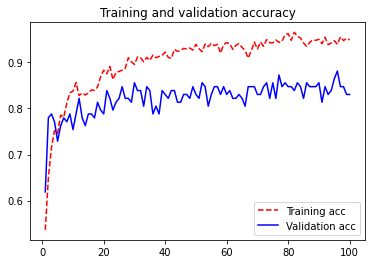

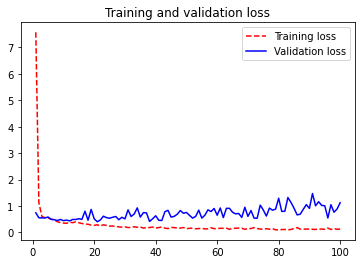

In [ ]:
plot_accuracy_and_loss(densenet_2_history)

In [ ]:
test_loss, test_acc = densenet_2.evaluate(X_test_original, y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 1s 107ms/step - loss: 0.8002 - binary_accuracy: 0.8571
Accuracy: 0.8571428656578064
Loss:  0.8002351522445679


Ensembling all the models

In [ ]:
# vgg = tf.keras.models.load_model(path+'/models/test2/vgg-output1')
# densenet_1 = tf.keras.models.load_model(path+'/models/test2/densenet-output2')
# densenet_2 = tf.keras.models.load_model(path+'/models/test2/densenet-output3')

In [ ]:
# print(X_train.shape)
# train = tf.concat([X_train, X_train2, X_train3], 0)
labels = tf.concat([y_train_enc, y_train_enc, y_train_enc], 0)
# print(train.shape)
# print(labels.shape)

In [ ]:
vgg.trainable = False
densenet_1.trainable = False
densenet_2.trainable = False
models = [vgg, densenet_1, densenet_2]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')

In [ ]:
# ensemble = tf.keras.models.load_model(path + "/models/test2/ensemble")

In [ ]:
average = tf.keras.layers.Average()([vgg.output, densenet_1.output, densenet_2.output])
dense = tf.keras.layers.Dense(1, activation='sigmoid')(average)

ensemble = tf.keras.Model([vgg.input, densenet_1.input, densenet_2.input], dense)

In [ ]:
ensemble.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3_2 (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2_2 (ZeroPaddin  (None, 230, 230, 3)  0          ['input_3_2[0][0]']              
 g2D)                                                                                             
                                                                                                  
 conv1/conv_2 (Conv2D)          (None, 112, 112, 64  9408        ['zero_padding2d_2_2[0][0]']     
                                )                                                           

In [ ]:
# from keras.utils.vis_utils import plot_model

In [ ]:
# plot_model(ensembled, to_file = 'new_model.png', dpi=50)

In [ ]:
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
model_checkpoint_path = path + '/models/test3/ensemble'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
ensemble_history = ensemble.fit([X_train, X_train, X_train],labels,
                                epochs=100,
                                validation_data=([X_valid_original, X_valid_original, X_valid_original], y_valid_enc),
                                batch_size = 16)
ensemble.save(model_checkpoint_path)

Epoch 1/100
86/86 [==============================] - 59s 358ms/step - loss: 1.0004 - binary_accuracy: 0.0131 - val_loss: 0.9139 - val_binary_accuracy: 0.1356
Epoch 2/100
86/86 [==============================] - 20s 233ms/step - loss: 0.9521 - binary_accuracy: 0.0153 - val_loss: 0.8785 - val_binary_accuracy: 0.1271
Epoch 3/100
86/86 [==============================] - 20s 236ms/step - loss: 0.9131 - binary_accuracy: 0.0066 - val_loss: 0.8449 - val_binary_accuracy: 0.1271
Epoch 4/100
86/86 [==============================] - 20s 237ms/step - loss: 0.8695 - binary_accuracy: 0.0044 - val_loss: 0.8133 - val_binary_accuracy: 0.1356
Epoch 5/100
86/86 [==============================] - 20s 238ms/step - loss: 0.8330 - binary_accuracy: 0.0073 - val_loss: 0.7834 - val_binary_accuracy: 0.1441
Epoch 6/100
86/86 [==============================] - 22s 251ms/step - loss: 0.7946 - binary_accuracy: 0.0117 - val_loss: 0.7554 - val_binary_accuracy: 0.1695
Epoch 7/100
86/86 [==============================] -

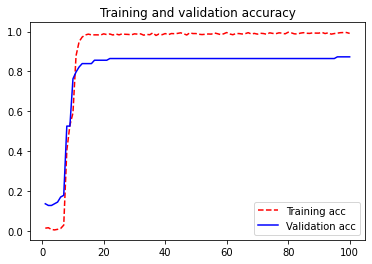

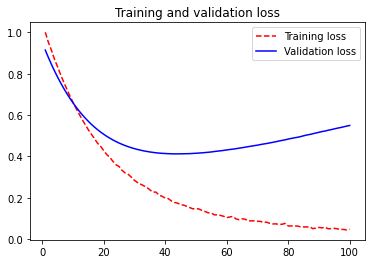

In [ ]:
plot_accuracy_and_loss(ensemble_history)

In [ ]:
test_loss, test_acc = ensemble.evaluate([X_test_original, X_test_original, X_test_original],  y_test_enc)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 9s 376ms/step - loss: 0.4176 - binary_accuracy: 0.8719
Accuracy: 0.871921181678772
Loss:  0.41758817434310913


Load ensemble model for further evaluation of performance matrix

In [ ]:
ensemble = tf.keras.models.load_model(path + "/models/test3/ensemble")

In [ ]:
    # from keras.utils.vis_utils import plot_model
    # plot_model(ensemble, to_file = path + '/models/test3/ensemble.png', dpi=50)

In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])

In [ ]:
num = 100
print(type(y_pred))
print(y_pred[num-10:num])
print(y_test_enc[num])
y_test_enc = np.array(y_test_enc)
print(type(y_test_enc))

<class 'numpy.ndarray'>
[[0.9833726 ]
 [0.96307933]
 [0.9833723 ]
 [0.98331696]
 [0.9833725 ]
 [0.9833725 ]
 [0.9833723 ]
 [0.00844115]
 [0.96719927]
 [0.0947251 ]]
tf.Tensor(0, shape=(), dtype=int64)
<class 'numpy.ndarray'>


In [ ]:
y_pred[y_pred > 0.6] = 1.0
y_pred[y_pred <= 0.6] = 0.0

In [ ]:
print(y_pred.shape)

(203, 1)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

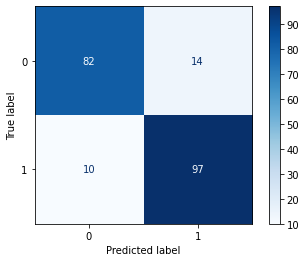

In [ ]:
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [ ]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

In [ ]:
result6 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.88,0.87,0.91,0.89,0.88,0.87,0.91,82,97,14,10


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.1] = 1.0
y_pred[y_pred <= 0.1] = 0.0
print("threshold - 0.1")
result1 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.1


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.84,0.8,0.93,0.86,0.83,0.8,0.93,71,99,25,8


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.2] = 1.0
y_pred[y_pred <= 0.2] = 0.0
print("threshold - 0.2")
result2 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.2


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.88,0.85,0.93,0.89,0.87,0.85,0.93,79,99,17,8


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.3] = 1.0
y_pred[y_pred <= 0.3] = 0.0
print("threshold - 0.3")
result3 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.3


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.88,0.85,0.93,0.89,0.87,0.85,0.93,79,99,17,8


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.4] = 1.0
y_pred[y_pred <= 0.4] = 0.0
print("threshold - 0.4")
result4 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.4


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.87,0.85,0.92,0.88,0.87,0.85,0.92,79,98,17,9


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 0.0
print("threshold - 0.5")
result5 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.5


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.87,0.86,0.91,0.88,0.87,0.86,0.91,80,97,16,10


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.7] = 1.0
y_pred[y_pred <= 0.7] = 0.0
print("threshold - 0.7")
result7 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.7


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.89,0.88,0.91,0.89,0.89,0.88,0.91,83,97,13,10


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.8] = 1.0
y_pred[y_pred <= 0.8] = 0.0
print("threshold - 0.8")
result8 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.8


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.85,0.89,0.81,0.85,0.85,0.89,0.81,85,87,11,20


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.9] = 1.0
y_pred[y_pred <= 0.9] = 0.0
print("threshold - 0.9")
result9 = binary_classification_performance(y_test_enc, y_pred)
binary_classification_performance(y_test_enc, y_pred)

threshold - 0.9


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.85,0.91,0.8,0.85,0.85,0.91,0.8,87,86,9,21


In [ ]:
results = [result1, result2, result3, result4, result5, result6, result7, result8, result9 ]

In [ ]:
accuracies = [i['Accuracy'] for i in results ]
recalls = [i['Recall (senitivity or TPR)'] for i in results ]
precisions = [i['Precision (or PPV)'] for i in results ]
f1s = [i['f1 score'] for i in results ]

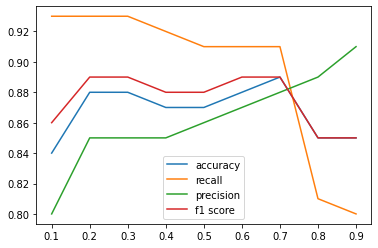

In [ ]:
X = np.linspace(0.1, 0.9, 9)
plt.plot(X, accuracies, label="accuracy")
plt.plot(X, recalls, label='recall')
plt.plot(X, precisions, label='precision')
plt.plot(X, f1s, label='f1 score')
plt.legend()
plt.show()

In [ ]:
results = pd.concat(results)

In [ ]:
results.insert(0, "Threshold", X, True)

In [ ]:
results = results.reset_index(drop=True)

In [ ]:
pd.set_option('precision', 4)

In [ ]:
results.style.highlight_max(color = 'red')
# your_df.style.highlight_max(color = 'green')


,Threshold,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.1000,0.8400,0.8000,0.9300,0.8600,0.8300,0.8000,0.9300,71,99,25,8
1,0.2000,0.8800,0.8500,0.9300,0.8900,0.8700,0.8500,0.9300,79,99,17,8
2,0.3000,0.8800,0.8500,0.9300,0.8900,0.8700,0.8500,0.9300,79,99,17,8
3,0.4000,0.8700,0.8500,0.9200,0.8800,0.8700,0.8500,0.9200,79,98,17,9
4,0.5000,0.8700,0.8600,0.9100,0.8800,0.8700,0.8600,0.9100,80,97,16,10
5,0.6000,0.8800,0.8700,0.9100,0.8900,0.8800,0.8700,0.9100,82,97,14,10
6,0.7000,0.8900,0.8800,0.9100,0.8900,0.8900,0.8800,0.9100,83,97,13,10
7,0.8000,0.8500,0.8900,0.8100,0.8500,0.8500,0.8900,0.8100,85,87,11,20
8,0.9000,0.8500,0.9100,0.8000,0.8500,0.8500,0.9100,0.8000,87,86,9,21
